In [1]:
%config InlineBackend.figure_formats = ["retina"]

In [2]:
import census
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from census import Census
from sklearn.linear_model import HuberRegressor

/opt/anaconda3/envs/mggg/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
census = Census("", year=2020)

In [4]:
total_pop_col = "B06012_001E"
below_poverty_level_pop_col = "B06012_002E"

In [5]:
year = 2017

In [6]:
acs_poverty_df = pd.DataFrame(
    census.acs5.get(
        (total_pop_col, below_poverty_level_pop_col),
        geo={
            "for": "county:*",
            "in": f"state:*",
        },
        year=year,
    )
)

In [7]:
acs_poverty_df["GEOID"] = acs_poverty_df["state"] + acs_poverty_df["county"]
acs_poverty_df = acs_poverty_df.set_index("GEOID").drop(columns=["state", "county"]).rename(
    columns={
        total_pop_col: "total_pop",
        below_poverty_level_pop_col: "below_poverty_level_pop",
    }
)
acs_poverty_df["poverty_rate"] = 100 * acs_poverty_df["below_poverty_level_pop"] / acs_poverty_df["total_pop"] 

In [8]:
acs_poverty_df

,total_pop,below_poverty_level_pop,poverty_rate
GEOID,,,
40045,4057.0,696.0,17.155534
40051,53520.0,6645.0,12.415919
40119,72614.0,19108.0,26.314485
40125,68244.0,11581.0,16.969990
40037,69747.0,10589.0,15.182015
...,...,...,...
40123,36806.0,6351.0,17.255339
40129,3684.0,677.0,18.376764
40153,20114.0,2348.0,11.673461


In [9]:
incarc_all_years_df = pd.read_csv("https://raw.githubusercontent.com/vera-institute/incarceration-trends/refs/heads/main/incarceration_trends.csv")

In [10]:
incarc_df = incarc_all_years_df[incarc_all_years_df["year"] == year].set_index("fips")
incarc_df.index = incarc_df.index.astype(str).str.zfill(5)

In [11]:
pd.set_option('display.max_columns', None)

incarc_df

,yfips,year,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_pop,female_jail_pop,male_jail_pop,female_adult_jail_pop,female_juvenile_jail_pop,male_adult_jail_pop,male_juvenile_jail_pop,aapi_jail_pop,black_jail_pop,latinx_jail_pop,native_jail_pop,white_jail_pop,other_race_jail_pop,total_jail_pretrial,total_jail_from_prison,total_jail_from_other_jail,total_jail_from_fed,total_jail_from_bia,total_jail_from_bop,total_jail_from_ice,total_jail_from_marshals,total_jail_from_other_fed,jail_rated_capacity,private_jail_flag,regional_jail_flag,total_jail_adm,total_jail_dis,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,aapi_prison_pop,black_prison_pop,latinx_prison_pop,native_prison_pop,other_race_prison_pop,white_prison_pop,aapi_female_prison_pop,aapi_male_prison_pop,black_female_prison_pop,black_male_prison_pop,latinx_female_prison_pop,latinx_male_prison_pop,native_female_prison_pop,native_male_prison_pop,other_race_female_prison_pop,other_race_male_prison_pop,white_female_prison_pop,white_male_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,aapi_prison_adm,black_prison_adm,latinx_prison_adm,native_prison_adm,other_race_prison_adm,white_prison_adm,aapi_female_prison_adm,aapi_male_prison_adm,black_female_prison_adm,black_male_prison_adm,latinx_female_prison_adm,latinx_male_prison_adm,native_female_prison_adm,native_male_prison_adm,other_race_female_prison_adm,other_race_male_prison_adm,white_female_prison_adm,white_male_prison_adm,total_jail_pop_rate,female_jail_pop_rate,male_jail_pop_rate,aapi_jail_pop_rate,black_jail_pop_rate,latinx_jail_pop_rate,native_jail_pop_rate,white_jail_pop_rate,total_jail_adm_rate,total_jail_pretrial_rate,total_prison_pop_rate,female_prison_pop_rate,male_prison_pop_rate,aapi_prison_pop_rate,black_prison_pop_rate,latinx_prison_pop_rate,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,201701001,2017,AL,Autauga County,55443,36352,18500,17852,585.0,7440.0,1023.0,149.0,27155.0,small/mid,South,East South Central,60.0,33860.0,594.45,165.0,25.0,127.0,25.0,0.0,127.0,0.0,0.00,48.00,2.00,0.83,76.0,0.0,97.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,780.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.90,135.14,711.40,0.00,645.16,195.50,557.05,279.87,2145.69,266.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01003,201701003,2017,AL,Baldwin County,212619,132067,67930,64137,1955.0,13108.0,6025.0,1060.0,109919.0,small/mid,South,East South Central,254.0,19300.0,1589.82,629.0,109.0,511.0,109.0,0.0,511.0,0.0,9.00,166.00,37.64,2.34,406.0,0.0,487.0,455.85,3.6,83.0,0.0,10.0,6.0,67.0,0.0,856.0,0.0,0.0,14990.0,14856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.27,160.46,796.73,460.36,1266.40,624.73,220.75,369.36,11350.30,368.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01005,201701005,2017,AL,Barbour County,25158,16086,7068,9018,97.0,8127.0,667.0,66.0,7129.0,rural,South,East South Central,20.0,NaN,885.00,111.0,8.0,92.0,8.0,0.0,92.0,0.0,0.00,10.00,8.00,3.66,82.0,0.0,42.0,74.00,0.0,2.0,0.0,0.0,1.0,1.0,0.0,129.0,0.0,0.0,780.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

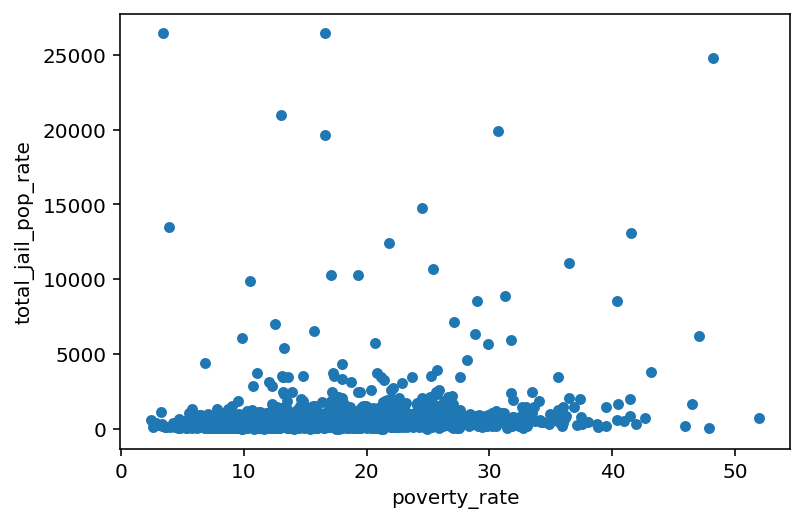

In [12]:
rates_df = incarc_df[["total_jail_pop_rate"]].join(acs_poverty_df[["total_pop", "poverty_rate"]])
rates_df.plot.scatter(x="poverty_rate", y="total_jail_pop_rate")
plt.show()

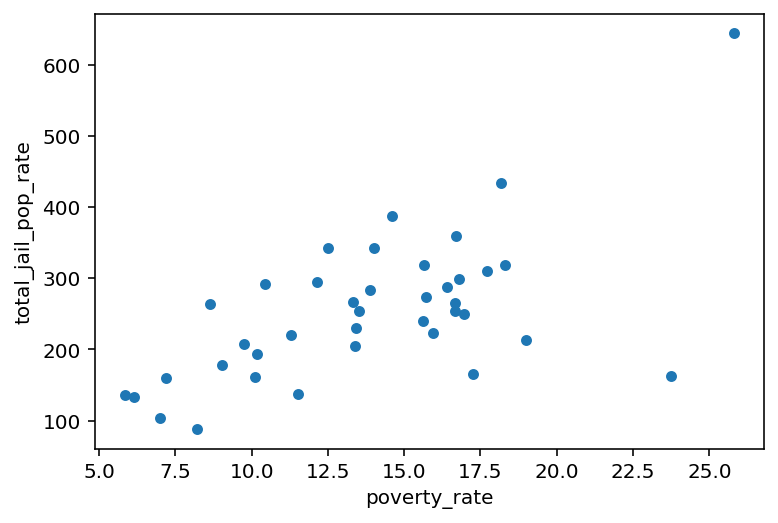

In [13]:
rates_df[rates_df["total_pop"] > 1000000].plot.scatter(x="poverty_rate", y="total_jail_pop_rate")
plt.show()

In [14]:
rates_df

,total_jail_pop_rate,total_pop,poverty_rate
fips,,,
01001,453.90,54558.0,13.715679
01003,476.27,200313.0,11.845462
01005,690.04,23283.0,27.195808
01007,502.71,20555.0,15.242034
01009,367.77,57051.0,15.633381
...,...,...,...
56037,460.35,43914.0,12.009837
56039,154.17,22825.0,6.838992
56041,337.04,20523.0,14.851630


In [15]:
state_rates_df = rates_df[rates_df.index.str.startswith("36")]

In [16]:
xs = np.linspace(state_rates_df["poverty_rate"].min(), state_rates_df["poverty_rate"].max())

In [17]:
model = HuberRegressor().fit(
    X=state_rates_df["poverty_rate"].to_numpy().reshape(-1, 1),
    y=state_rates_df["total_jail_pop_rate"],
    sample_weight=state_rates_df["total_pop"],
)
slope = model.coef_[0]
intercept = model.intercept_

/var/folders/wr/pcqhnvhd7cn8ssjr1v95ffrr0000gn/T/ipykernel_73886/601119352.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


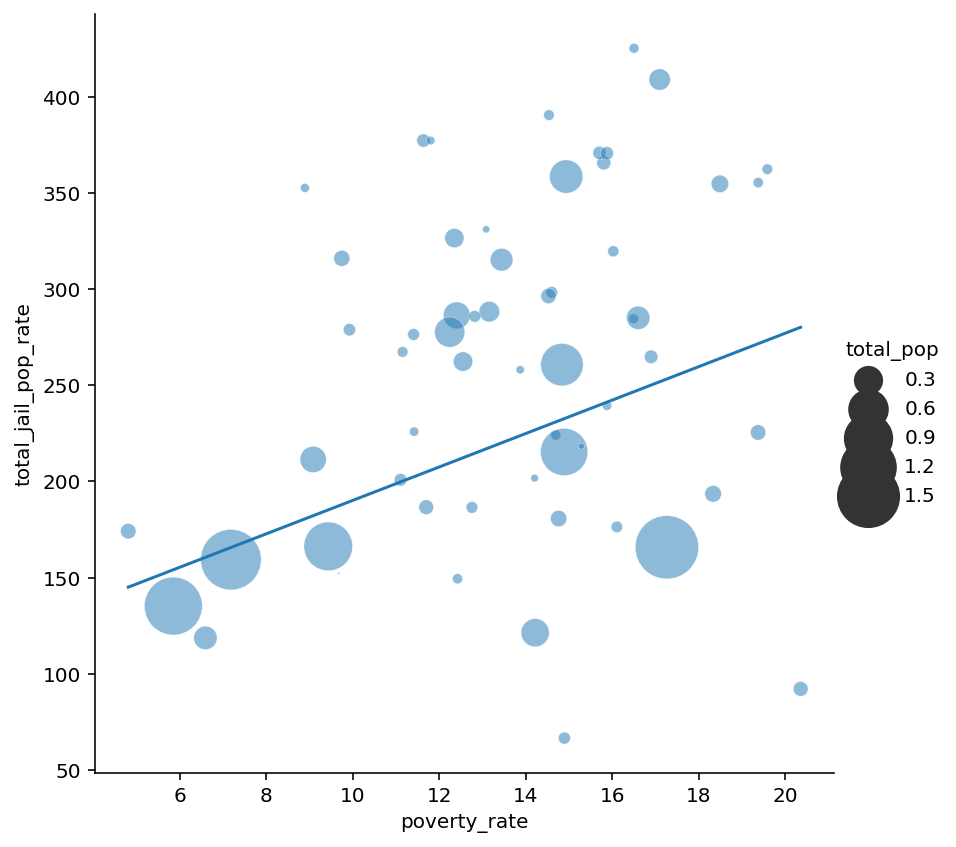

In [18]:
g = sns.relplot(
    x="poverty_rate",
    y="total_jail_pop_rate",
    size="total_pop",
    sizes=(1, 1000),
    alpha=.5,
    palette="muted",
    height=6,
    data=state_rates_df,
)
#g.set(ylim=(0, 1000))
plt.plot(xs, (slope * xs) + intercept)
plt.show()

/var/folders/wr/pcqhnvhd7cn8ssjr1v95ffrr0000gn/T/ipykernel_73886/1364369944.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


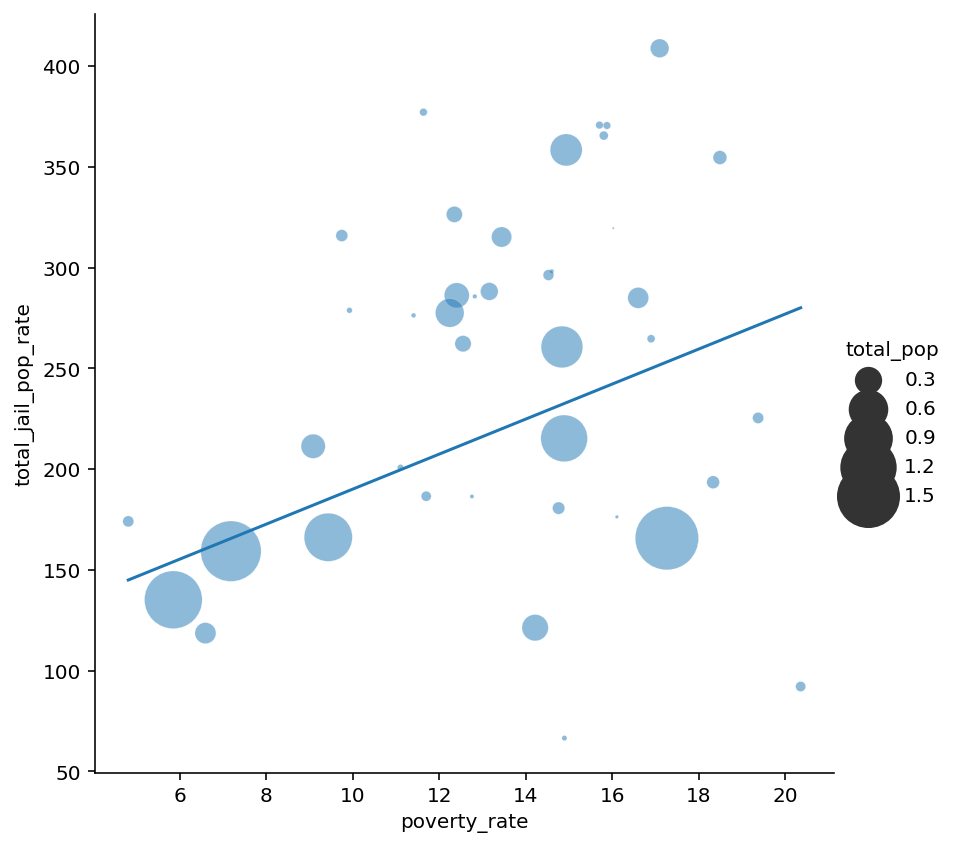

In [19]:
g = sns.relplot(
    x="poverty_rate",
    y="total_jail_pop_rate",
    size="total_pop",
    sizes=(1, 1000),
    alpha=.5,
    palette="muted",
    height=6,
    data=state_rates_df[state_rates_df["total_pop"] > 50000],
)
#g.set(ylim=(0, 1000))
plt.plot(xs, (slope * xs) + intercept)
plt.show()

In [20]:
incarc_df.iloc[incarc_df["total_jail_pop_rate"].argmax()][["total_pop", "total_jail_pop", "total_jail_pop_rate"]]

total_pop                  2207
total_jail_pop           367.95
total_jail_pop_rate    26433.19
Name: 48125, dtype: object

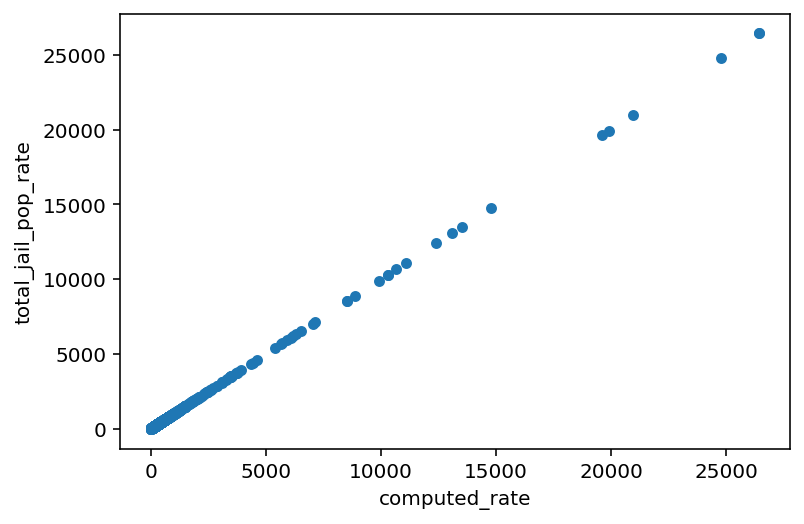

In [24]:
pd.DataFrame({
    'computed_rate': (100000 * incarc_df["total_jail_pop"] / incarc_df["total_pop_15to64"]),
    'total_jail_pop_rate': incarc_df["total_jail_pop_rate"]
}).plot.scatter(x='computed_rate', y='total_jail_pop_rate')
plt.show()